<center> <h1> US Adult Income Analysis </h1> </center>

The following jupyter notebook is an analysis into the Database for Adult Income in the United States. The Us Adult income dataset was extracted by Barry Becker from the 1994 US Census Database. The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more. Each row is labelled as either having a salary greater than ">50K" or "<=50K". The main tasks here would be cleaning the data, Exploring it and building the appropriate model to predict the salary.  

In [698]:
#import libraries
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings

In [743]:
df = pd.read_csv("adult.csv")

In [744]:
df.shape

(32561, 15)

#### 1. Data Cleaning

For the data cleaning task we will look at each column and do some catagorical changes and eliminate any unwanted rows that will help us ease the process of building a model.  

In [745]:
#parsing gender
df['sex'].replace(['Male','Female'],['1','0'], inplace=True)

In [746]:
#parsing education
def education(x):
    if x == 'Bachelors' or x == 'Some-college':
        return 'Bachelors'
    elif x == 'Assoc-voc' or x== 'Assoc-acdm':
        return 'Associate'
    elif x == '1st-4th' or x == '1st-4th' or x == '5th-6th' or x == '7th-8th' or x == '9th' or x == '10th' or x == '11th' or x == '12th' or x == 'HS-grad':
        return 'High School'
    else:
        return x

In [747]:
df['education'] = df['education'].apply(lambda x: education(x))

In [748]:
#parsing marital status
def status(x):
    if x == 'Divorced' or x == 'Widowed' or x=='Never-married' or x == 'Separated':
        return '1'
    else:
        return '0'

In [749]:
df['status'] = df['marital.status'].apply(lambda x: status(x))

In [750]:
#handling null values 
for i in df.columns:
    df[i].replace('?', np.nan, inplace=True)

In [751]:
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
status               0
dtype: int64


In [752]:
x = df.shape
print('Shape: {}'.format(x))

Shape: (32561, 16)


In [753]:
df = df.dropna(subset=['workclass','occupation','native.country'], how='all')

In [754]:
y = df.shape
print("Rows Dropped: {}".format(x[0] - y[0]))
print("Shape: {}".format(y))

Rows Dropped: 27
Shape: (32534, 16)


In [755]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,status
0,90,NaN,77053,High School,9,Widowed,NaN,Not-in-family,White,0,0,4356,40,United-States,<=50K,1
1,82,Private,132870,High School,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,<=50K,1
2,66,NaN,186061,Bachelors,10,Widowed,NaN,Unmarried,Black,0,0,4356,40,United-States,<=50K,1
3,54,Private,140359,High School,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,<=50K,1
4,41,Private,264663,Bachelors,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,<=50K,1


#### 2. Exploratory Data Analysis

Doing some exploratory data analysis on the data will allow us to look at the independant variables with respect to our dependant variables. We can select the variables that will help us fit the best model for our data.

In [136]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,status
0,90,NaN,77053,High School,9,Widowed,NaN,Not-in-family,White,F,0,4356,40,United-States,<=50K,Single
1,82,Private,132870,High School,9,Widowed,Exec-managerial,Not-in-family,White,F,0,4356,18,United-States,<=50K,Single
2,66,NaN,186061,Bachelors,10,Widowed,NaN,Unmarried,Black,F,0,4356,40,United-States,<=50K,Single
3,54,Private,140359,High School,4,Divorced,Machine-op-inspct,Unmarried,White,F,0,3900,40,United-States,<=50K,Single
4,41,Private,264663,Bachelors,10,Separated,Prof-specialty,Own-child,White,F,0,3900,40,United-States,<=50K,Single


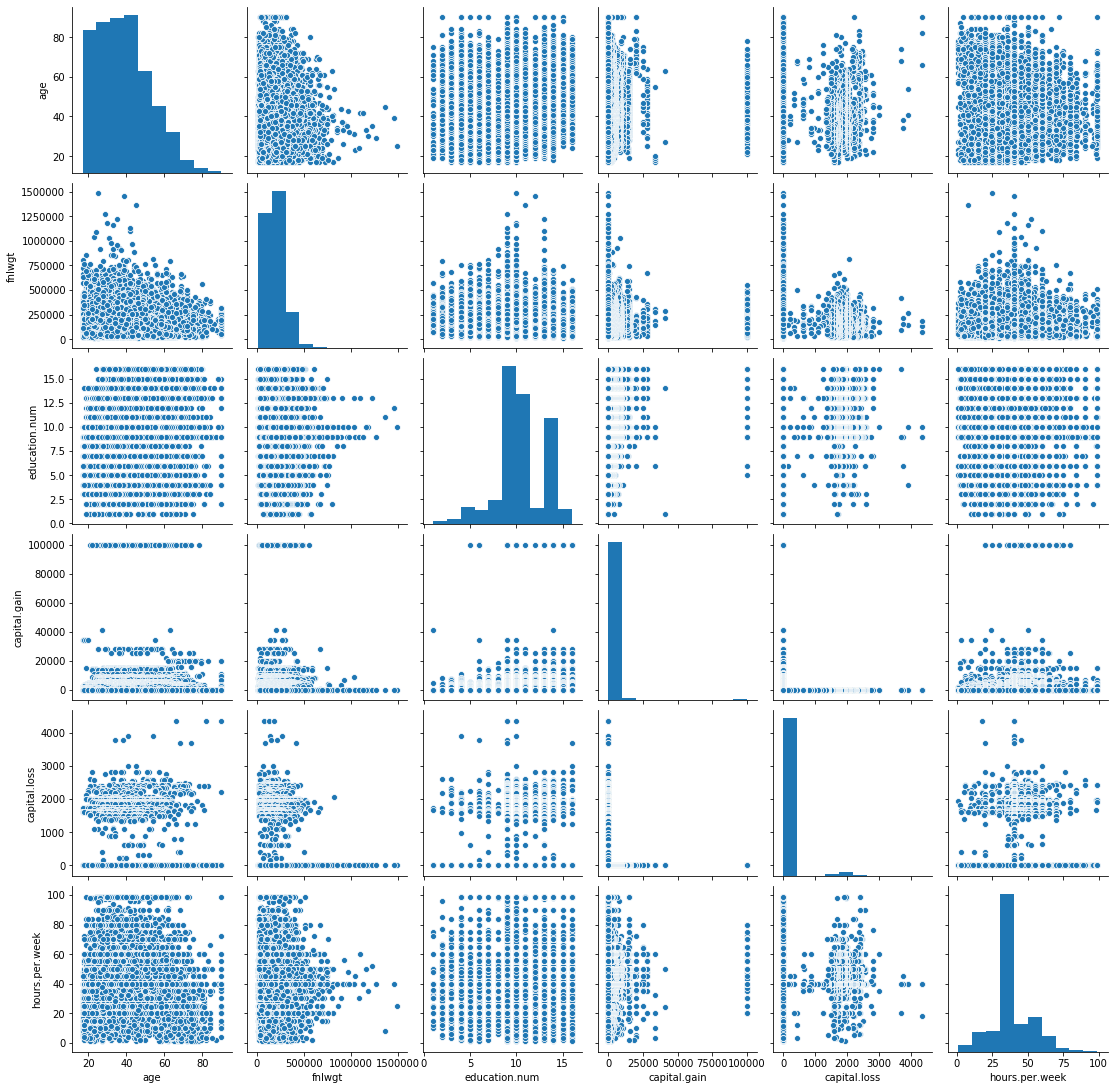

In [137]:
sns.pairplot(df)

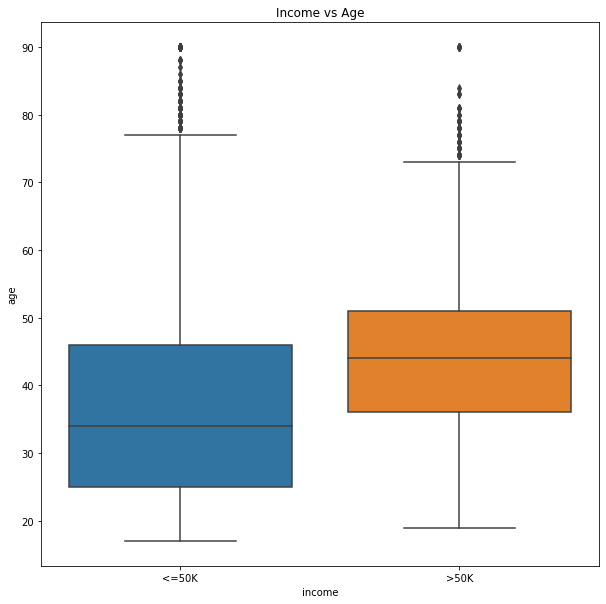

In [138]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=df)
plt.title("Income vs Age")
plt.show()

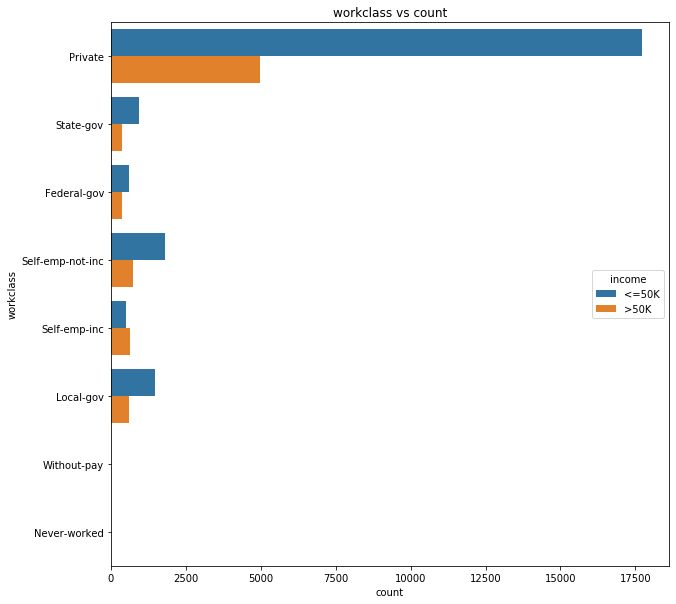

In [139]:
fig = plt.figure(figsize=(10,10)) 
ax = sns.countplot(y="workclass", hue="income", data=df).set_title("workclass vs count")

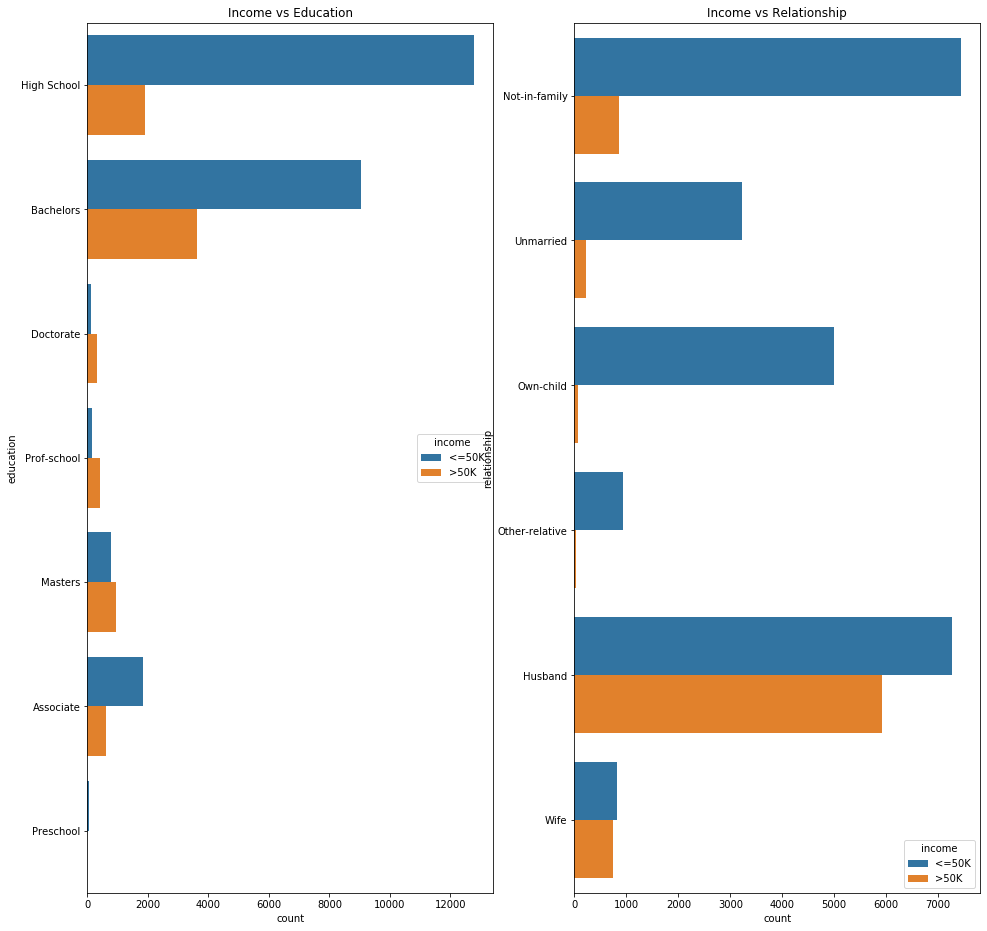

In [140]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,16))
sns.countplot(y="education", hue="income",data=df, ax = ax1).set_title("Income vs Education");
sns.countplot(y="relationship", hue="income",data=df, ax = ax2).set_title("Income vs Relationship");
plt.show()

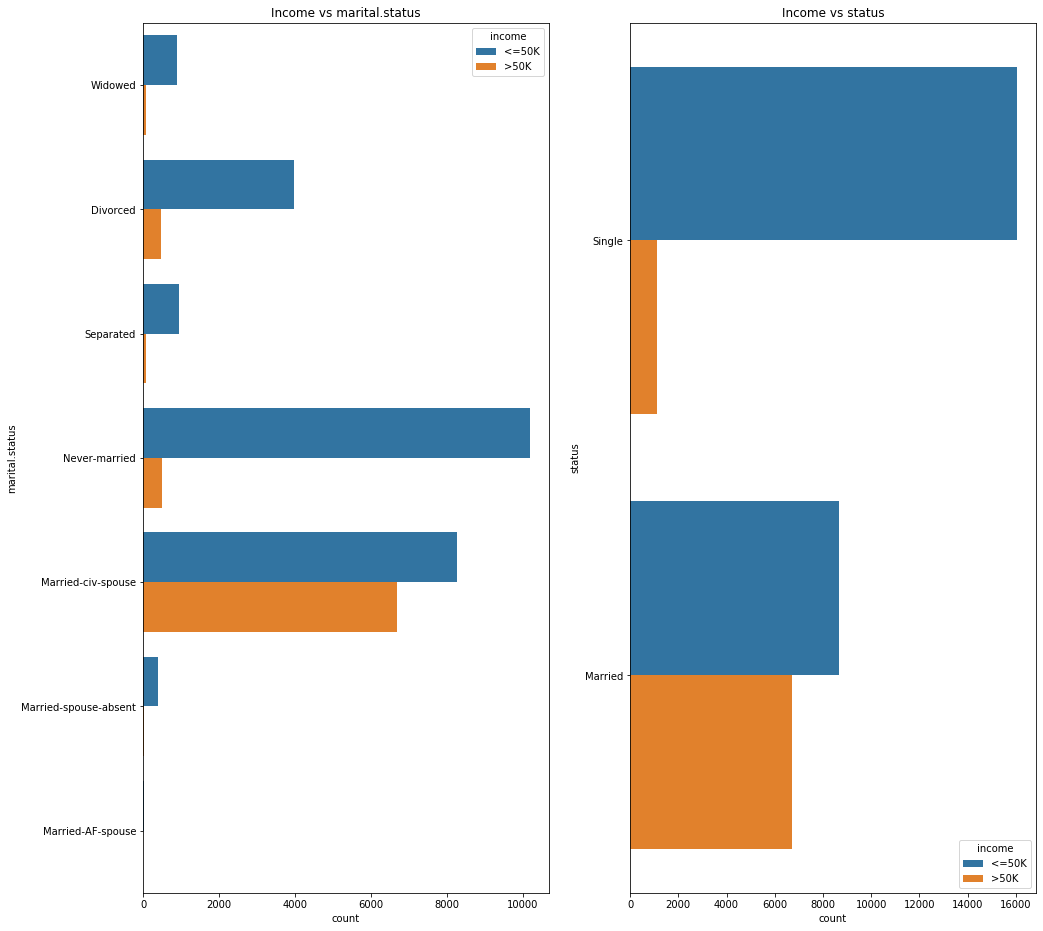

In [188]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,16))
sns.countplot(y="marital.status", hue="income",data=df, ax = ax1).set_title("Income vs marital.status");
sns.countplot(y="status", hue="income",data=df, ax = ax2).set_title("Income vs status");
plt.show()

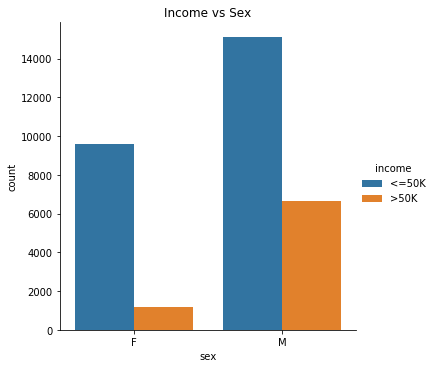

In [141]:
sns.catplot(x="sex", hue="income", kind="count",data=df)
plt.title("Income vs Sex");

Text(0.5, 1.0, 'Income vs Hours per Week')

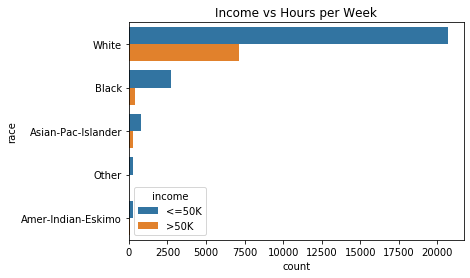

In [142]:
sns.countplot(hue='income',y='race',data=df)
plt.title("Income vs Hours per Week")

Text(0.5, 1, 'Income vs Hours per Week')

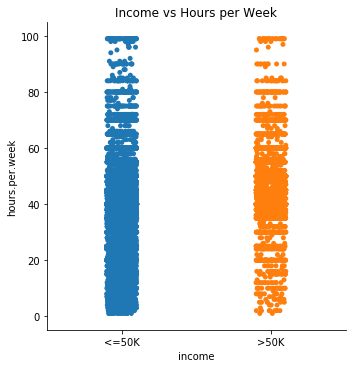

In [143]:
sns.catplot(x='income',y='hours.per.week',data=df)
plt.title("Income vs Hours per Week")

#### 3. Model Building

From the EDA we can see that certain variables affect income catagory, hence we will using those variables. Our dependant variable(y) which is income is split in two catagories. Hence our best bet would be to use logistic regression and random forests for classification and prediction.   

In [861]:
uad_df = df

In [862]:
uad_df = uad_df.drop(['fnlwgt','native.country','relationship','marital.status','education'], axis=1)
uad_df = uad_df.dropna()

In [863]:
uad_df

,age,workclass,education.num,occupation,race,sex,capital.gain,capital.loss,hours.per.week,income,status
1,82,Private,9,Exec-managerial,White,0,0,4356,18,<=50K,1
3,54,Private,4,Machine-op-inspct,White,0,0,3900,40,<=50K,1
4,41,Private,10,Prof-specialty,White,0,0,3900,40,<=50K,1
5,34,Private,9,Other-service,White,0,0,3770,45,<=50K,1
6,38,Private,6,Adm-clerical,White,1,0,3770,40,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Protective-serv,White,1,0,0,40,<=50K,1
32557,27,Private,12,Tech-support,White,0,0,0,38,<=50K,0
32558,40,Private,9,Machine-op-inspct,White,1,0,0,40,>50K,0
32559,58,Private,9,Adm-clerical,White,0,0,0,40,<=50K,1


In [865]:
rf_df = pd.get_dummies(uad_df, columns=["workclass",'occupation','race'],   #"native.country","race","relationship,"education",'marital.status'
                         prefix=["is_workclass","is_occupation","is_race"]) #"is_race","is_native.country","is_relationship","is_education",'is_marital.status'

In [866]:
rf_df

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income,status,is_workclass_Federal-gov,is_workclass_Local-gov,...,is_occupation_Prof-specialty,is_occupation_Protective-serv,is_occupation_Sales,is_occupation_Tech-support,is_occupation_Transport-moving,is_race_Amer-Indian-Eskimo,is_race_Asian-Pac-Islander,is_race_Black,is_race_Other,is_race_White
1,82,9,0,0,4356,18,<=50K,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,54,4,0,0,3900,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,41,10,0,0,3900,40,<=50K,1,0,0,...,1,0,0,0,0,0,0,0,0,1
5,34,9,0,0,3770,45,<=50K,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,38,6,1,0,3770,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,1,0,0,40,<=50K,1,0,0,...,0,1,0,0,0,0,0,0,0,1
32557,27,12,0,0,0,38,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32558,40,9,1,0,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,58,9,0,0,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [867]:
y = rf_df['income']
x = rf_df.drop(['income'], axis=1)

In [868]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, random_state = 42)

<b>Random Forest Classifier</b>

The first algorithm we will test is the random forrest classifier. We will check its performance using metric like accuracy, confusion matrix, precision and recall. 

In [869]:
randomforest = RandomForestClassifier()
fit=randomforest.fit(train_x,train_y)
y_pred = fit.predict(test_x)

In [870]:
def plot_confusion_matrix(cm, classes, normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

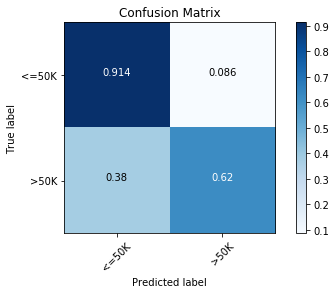

In [871]:
cfm = confusion_matrix(test_y,y_pred)
plot_confusion_matrix(cfm,classes=["<=50K", ">50K"], normalize=True)

In [872]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.841796875


<b>Logistic Regression</b>

The second algorithm we will test is logisitc regression to predict our dependent variable. We will check its performance using metrics like rmse and r2 values. 

In [873]:
logreg = LogisticRegression()
fit2 = logreg.fit(train_x,train_y)
y_pred2=fit2.predict(test_x)
warnings.filterwarnings('ignore')

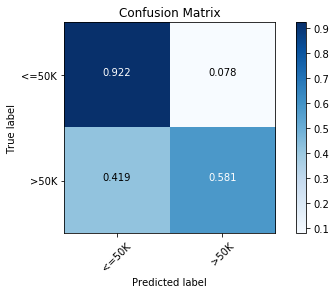

In [874]:
cfm = confusion_matrix(test_y,y_pred2)
plot_confusion_matrix(cfm,classes=["<=50K", ">50K"], normalize=True)

In [875]:
print(classification_report(test_y,y_pred2))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      4639
        >50K       0.71      0.58      0.64      1505

    accuracy                           0.84      6144
   macro avg       0.79      0.75      0.77      6144
weighted avg       0.83      0.84      0.83      6144



In [876]:
print("Accuracy:", accuracy_score(test_y, y_pred2))

Accuracy: 0.8385416666666666
